In [4]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploring the dataset

In [6]:
# Returning basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
# Returning basis Statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
# Returns if any null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
# Returns True if there are zero values
df.eq(0).any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [10]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [11]:
# Renaming the Attribute name
df = df.rename(columns={'Flavanoids' : 'Flavonoids' , 'Nonflavanoid_Phenols' : 'Non_Flavonoids' , 'Proanthocyanins' : 'Proanthocyanidins'})
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Overview 

1) Alcohol - The range of ABV for unfortified wine is about 5.5% to 16%, with an average of 11.6%. 

# Data Visualization

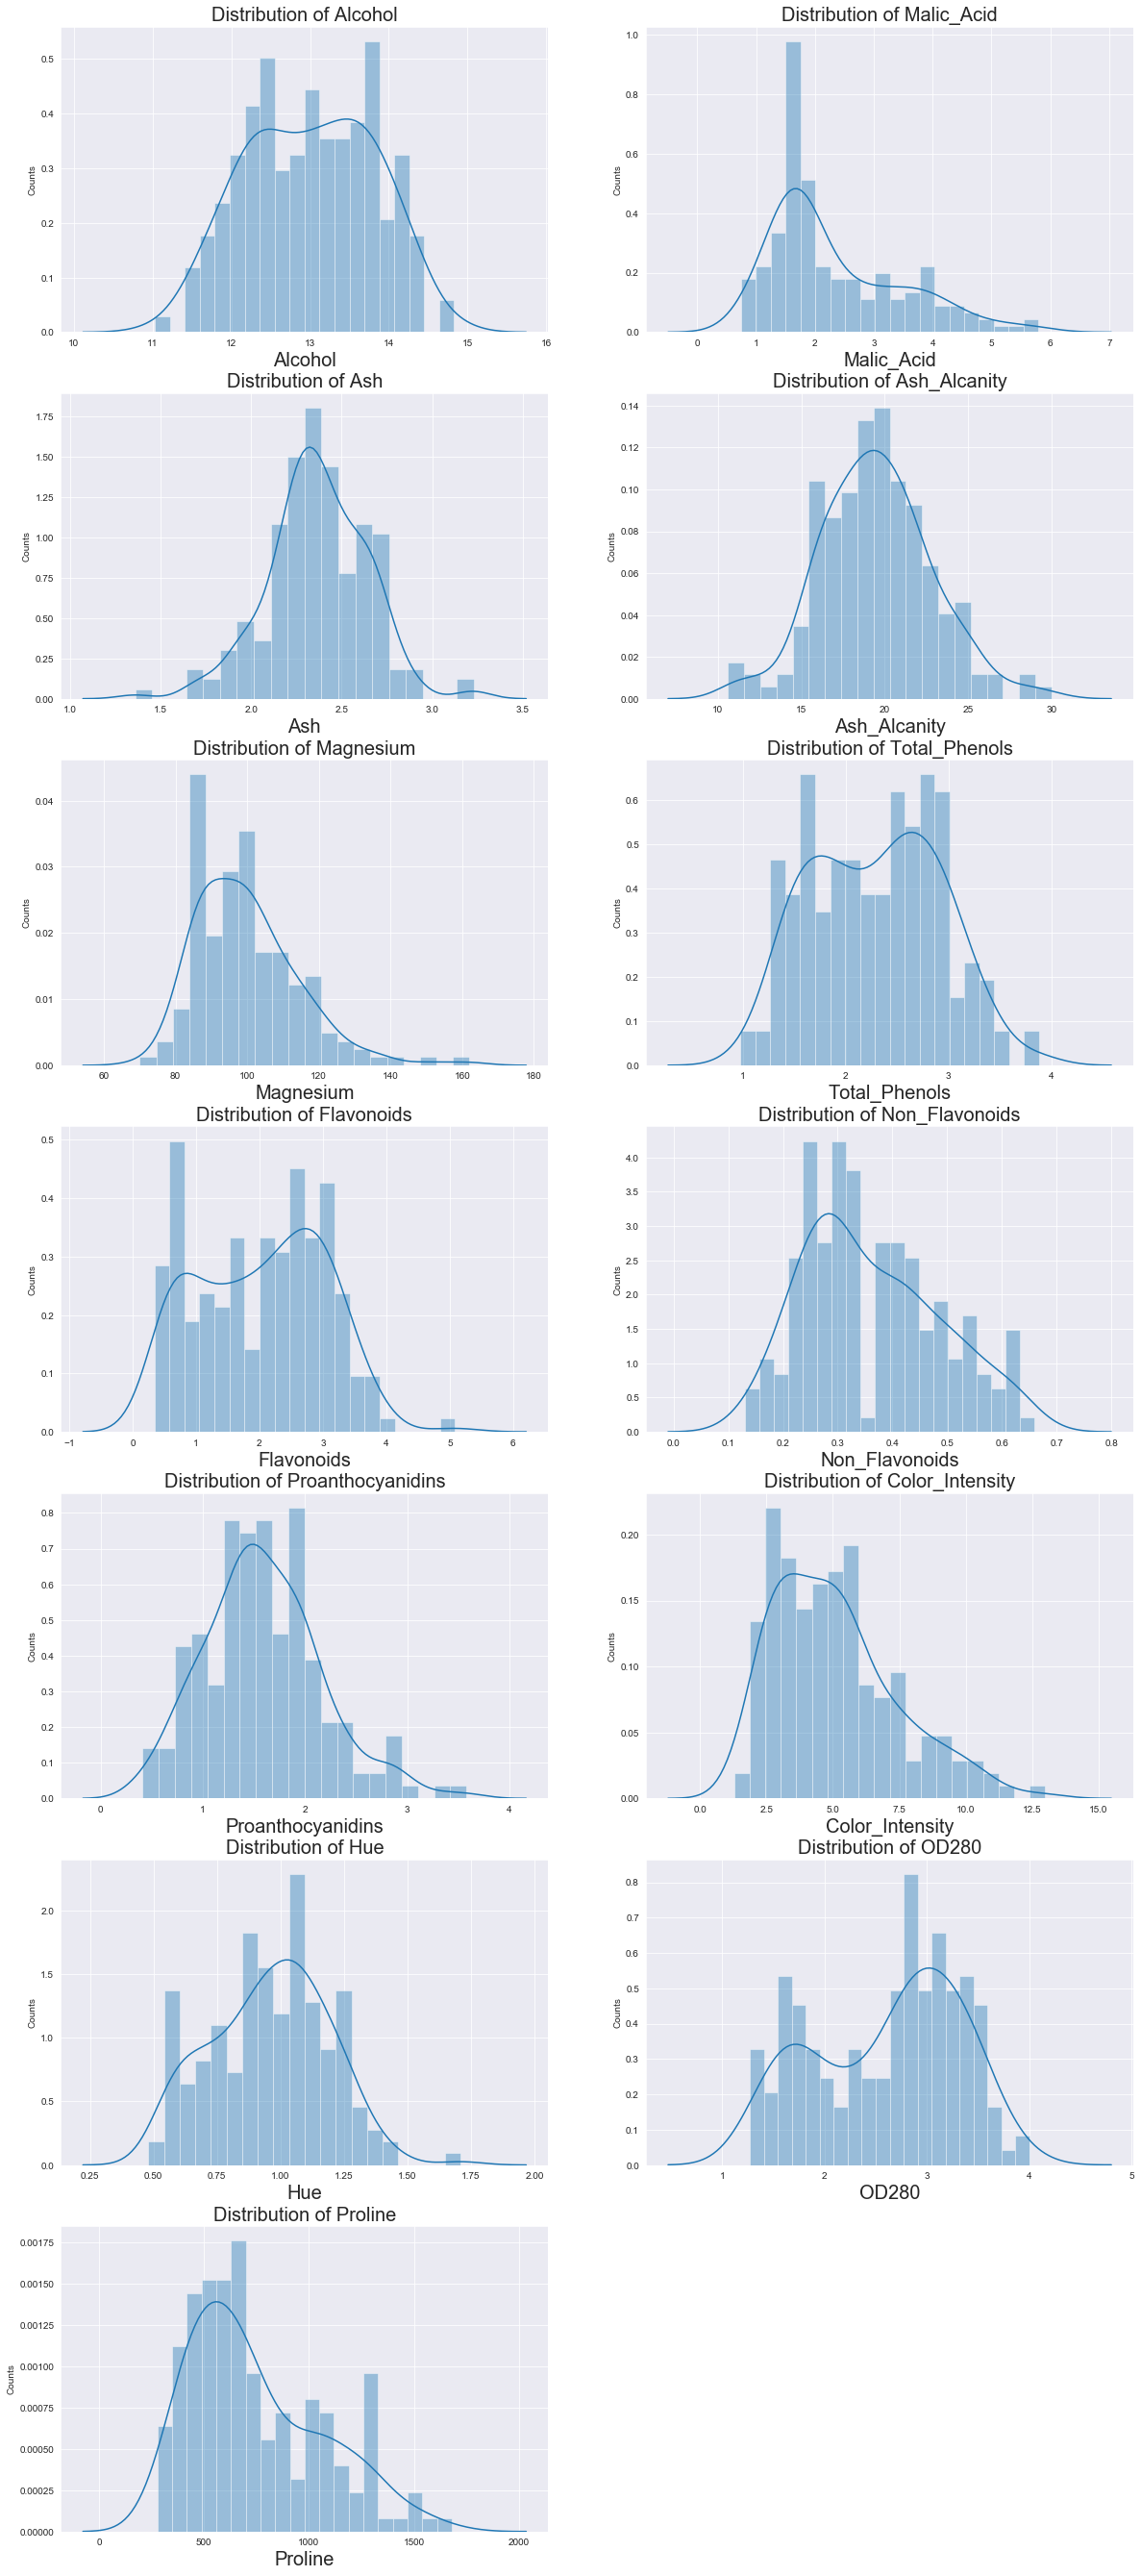

In [12]:
# Visualizing 

nrow = len(df.columns)
ncol = 2
subCnt = 1
plt.figure(figsize=(20,90))

for data in df.columns:
    plt.subplot(nrow,ncol,subCnt)
    sns.distplot(df[data], bins=20)
    plt.title("Distribution of " + data, fontsize=20)
    plt.xlabel(data , fontsize=20)
    plt.ylabel("Counts")
    subCnt += 1
    
plt.show()

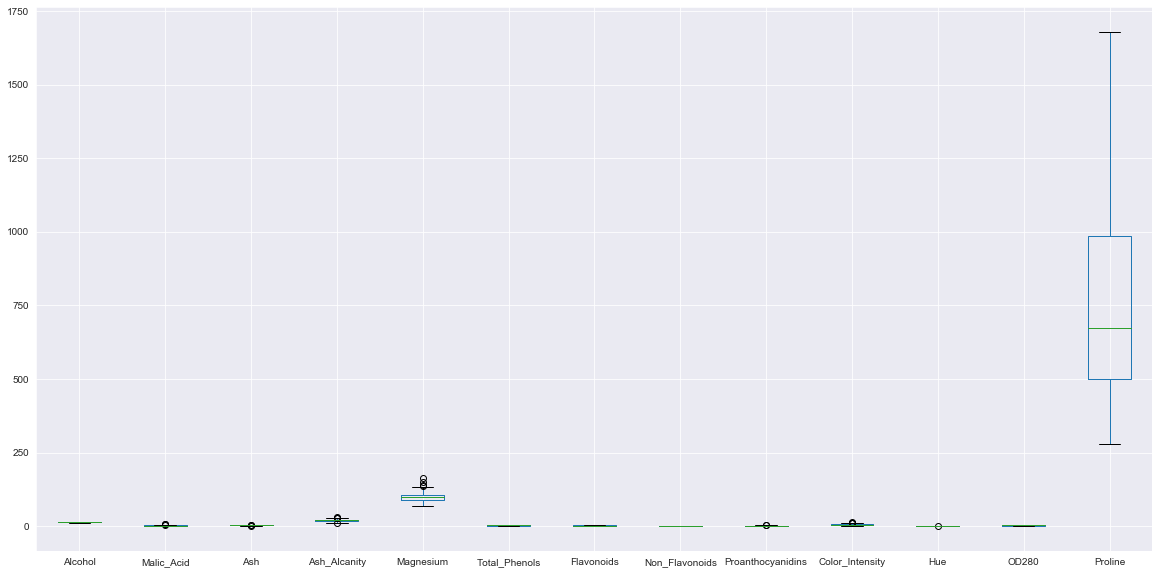

In [13]:
# Visualizing the feature by Boxplot
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [14]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavonoids', 'Non_Flavonoids', 'Proanthocyanidins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Scatter Plot

### Scatter Plot of Alcohol Vs Magnesium

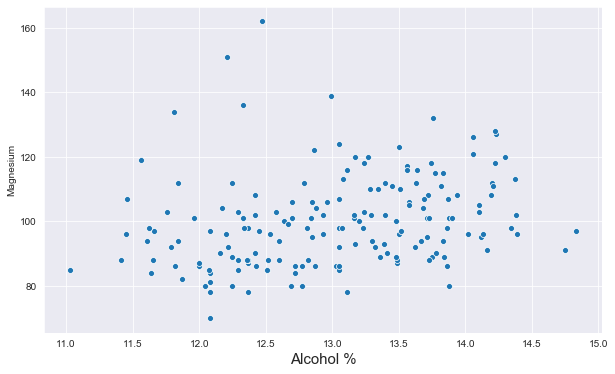

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.Alcohol, y = df.Magnesium)
plt.xlabel("Alcohol %", fontsize=15)
plt.ylabel("Magnesium")
plt.show()

### Scatter Plot of Alcohol Vs Ash

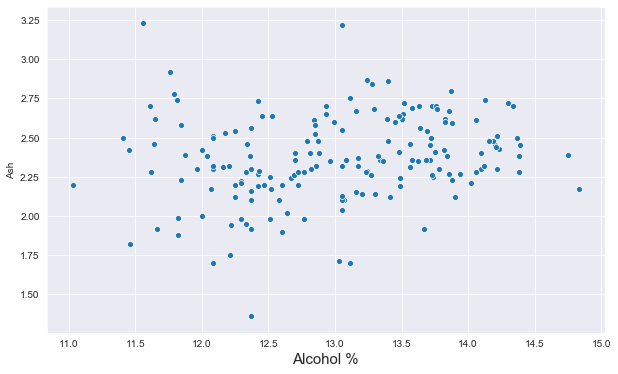

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.Alcohol, y = df.Ash)
plt.xlabel("Alcohol %", fontsize=15)
plt.ylabel("Ash")
plt.show()

### Scatter Plot of Alcohol Vs Proline

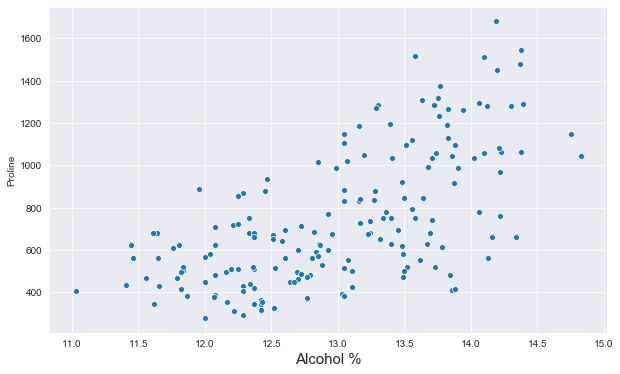

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.Alcohol, y = df.Proline)
plt.xlabel("Alcohol %", fontsize=15)
plt.ylabel("Proline")
plt.show()

### Scatter Plot of Total_Phenols Vs Magnesium

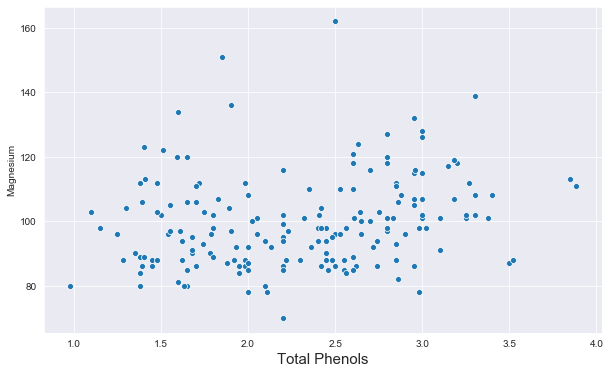

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.Total_Phenols, y = df.Magnesium)
plt.xlabel("Total Phenols", fontsize=15)
plt.ylabel("Magnesium")
plt.show()

### Scatter Plot of Proanthocyanidins Vs Magnesium

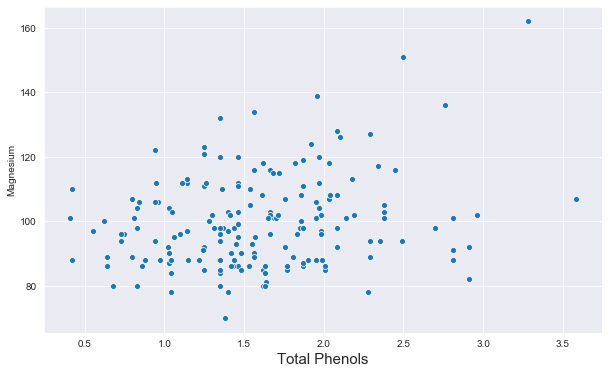

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df.Proanthocyanidins, y = df.Magnesium)
plt.xlabel("Total Phenols", fontsize=15)
plt.ylabel("Magnesium")
plt.show()

### Observation

From Scatter plot we observe the data is now distrubuted in porper way and the data points as scattered far away from each other

To make all data point in one scale we have to use scalling technique

In [20]:
df.shape

(178, 13)

# Data Preprocessing

In [21]:
# Selecting all the features as the features for clustering
X = df.iloc[:, 0:13]
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Feature Scaling

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Building

### Finding optimal number of clusters using Elbow Method

In [23]:
num =  []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(X)
    num.append(kmeans.inertia_)

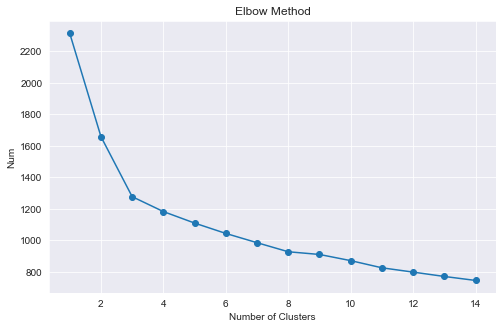

In [24]:
plt.figure(figsize=(8,5))
frame_scaled = pd.DataFrame({'Cluster':range(1,15), 'SSE':num})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Num')
plt.show()

From the above plot it is observed that 3 is optimal value for the given dataset.

In [25]:
# Training the KMeans model with n_clusters=3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=25)

y_pred = kmeans.fit_predict(X)

df['clusters'] = y_pred

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [26]:
# Returns the first x number of rows for clusters with 0 value when head(x)

df[df['clusters'] == 0].head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline,clusters
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,0
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,0
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,0
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,0
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,0
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,0
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,0


In [27]:
# Returns the first x number of rows for clusters with 1 value when head(x)

df[df['clusters'] == 1].head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline,clusters
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,1
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,1
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600,1
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,1
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,1
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,1


In [28]:
# Returns the first x number of rows for clusters with 2 value when head(x)

df[df['clusters'] == 2].head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavonoids,Non_Flavonoids,Proanthocyanidins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2


Observation

By Ovservation we get that increase in cluster value also slightly increasing the attributes value

# PCA(Principal Component Analysis)

We cannot visualize the clustering if you have more than 3 columns 

For visualization we can apply PCA to reduce the space in 2 columns and visualize this instead

In [29]:
# Returns data into PCA form into 2 columns
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data , columns = ['pca1','pca2'])
results.head()

,pca1,pca2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


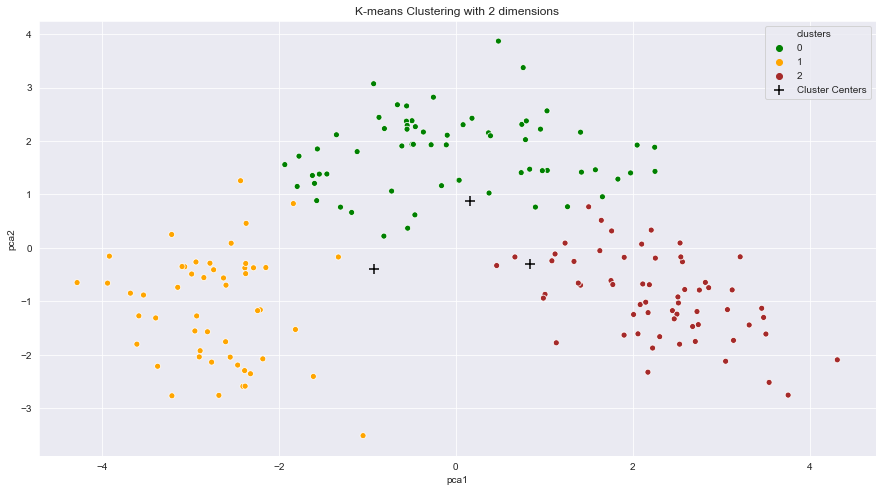

In [30]:
# Visualising the clusters
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'pca1' , y = 'pca2', hue = df['clusters'] , data = results, palette=['green','orange','brown'])
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('K-means Clustering with 2 dimensions')
plt.show()